<a href="https://colab.research.google.com/github/SriramyaK/Deep-Learning/blob/master/Lamborghini_vs_Mclaren_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
folder = 'Lamborghini'
file = 'Lamb.txt'

In [0]:
folder = 'Mclaren'
file = 'Mclaren.txt'

In [0]:
folder = 'Jagaur'
file = 'Jagaur.txt'

In [0]:
path = Path(base_dir + 'data/Cars')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [43]:
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/Cars/Mclaren.txt'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/Cars/Lamb.txt'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/Cars/Jagaur.txt'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/Cars/Lamborghini'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/Cars/Mclaren'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/Cars/Jagaur')]

In [0]:
classes = ['Lamborghini','Jagaur','Mclaren']

In [57]:
download_images(path/file, dest, max_pics=100,max_workers=0 )

In [59]:
for c in classes:
  print(c)
  verify_images(path/c,delete=True,max_workers=8)

Lamborghini


cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai-v3/data/Cars/Lamborghini/00000025.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai-v3/data/Cars/Lamborghini/00000091.jpg'>
Jagaur


Mclaren


cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai-v3/data/Cars/Mclaren/00000033.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai-v3/data/Cars/Mclaren/00000041.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai-v3/data/Cars/Mclaren/00000042.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai-v3/data/Cars/Mclaren/00000056.jpg'>


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [61]:
data.classes

['Jagaur', 'Lamborghini', 'Mclaren']

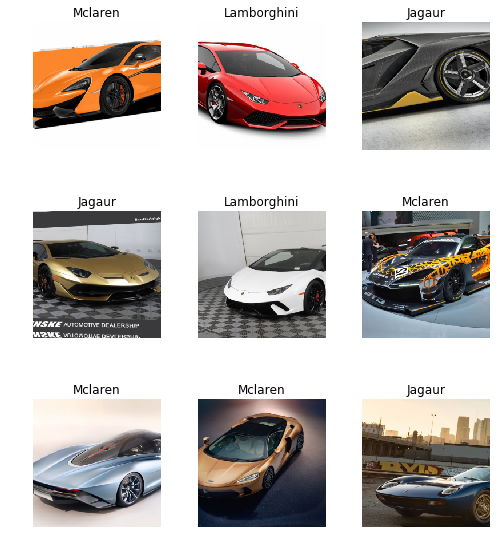

In [62]:
data.show_batch(rows=3, figsize=(7,8))

In [63]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Jagaur', 'Lamborghini', 'Mclaren'], 3, 254, 63)

In [64]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 83457218.94it/s]


In [65]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.507283,1.195805,0.555556,01:34
1,1.314429,1.033123,0.539683,01:35
2,1.256317,1.062596,0.507936,01:36
3,1.217058,1.076090,0.539683,01:35


In [0]:
learn.save('stage-1')

In [72]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.040252,1.091894,0.492063,02:05
1,0.999655,1.149632,0.523810,02:05


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

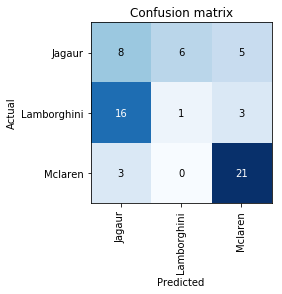

In [76]:
interp.plot_confusion_matrix()